/home/rendon/Documents/demo_mate_II/env/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/home/rendon/Documents/demo_mate_II/env/lib/python3.7/site-packages/matplotlib/axes/_axes.py:7609: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


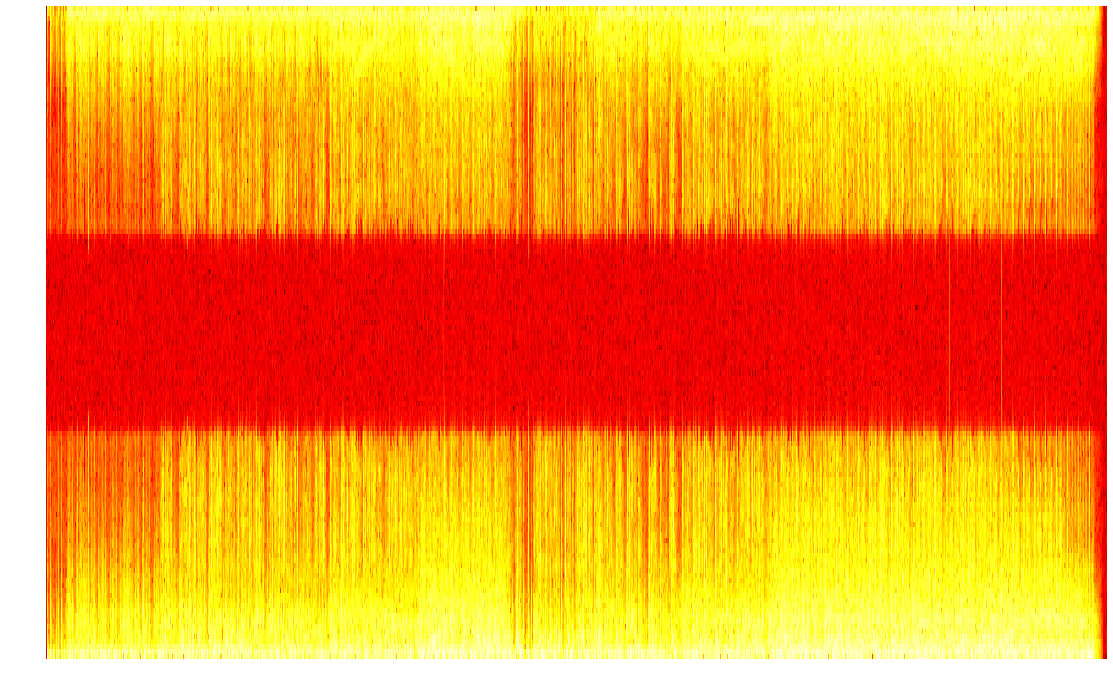

In [1]:
%matplotlib inline

import os
import wave
import pylab

def graph_spectrogram(wav_file, out_file, axis):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.set_cmap('hot')
    pylab.axis(axis)
    pylab.savefig(out_file, bbox_inches='tight');
    
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

graph_spectrogram('./song.wav', 'spectrogram.png', 'off')

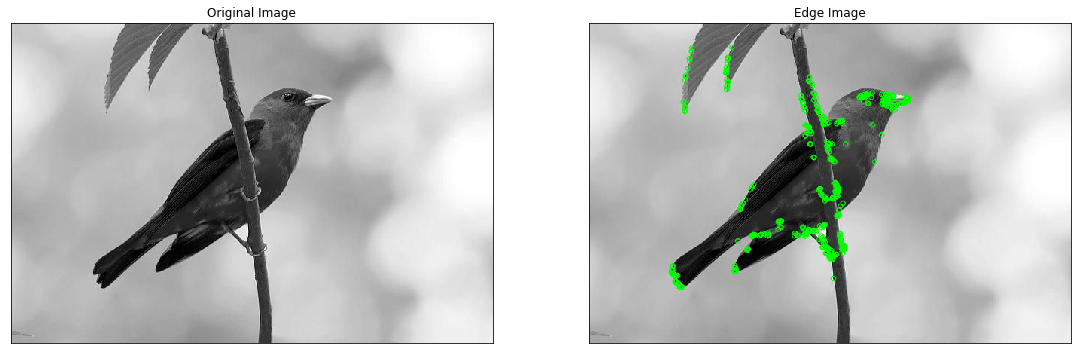

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

lena = cv.imread('test.png', 0)
img1 = cv.imread('spectrogram.png', 1)          # queryImage
img2 = cv.imread('test-45.png',1) # trainImage

orb = cv.ORB_create(scoreType=cv.ORB_FAST_SCORE) #orb = cv2.ORB_create()
kp2 = orb.detect(lena)
img2_kp = cv.drawKeypoints(lena, kp2, None, color=(0,255,0), \
        flags=cv.DrawMatchesFlags_DEFAULT)

plt.figure(num=None, figsize=(19, 12))
plt.subplot(121),plt.imshow(lena,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2_kp)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

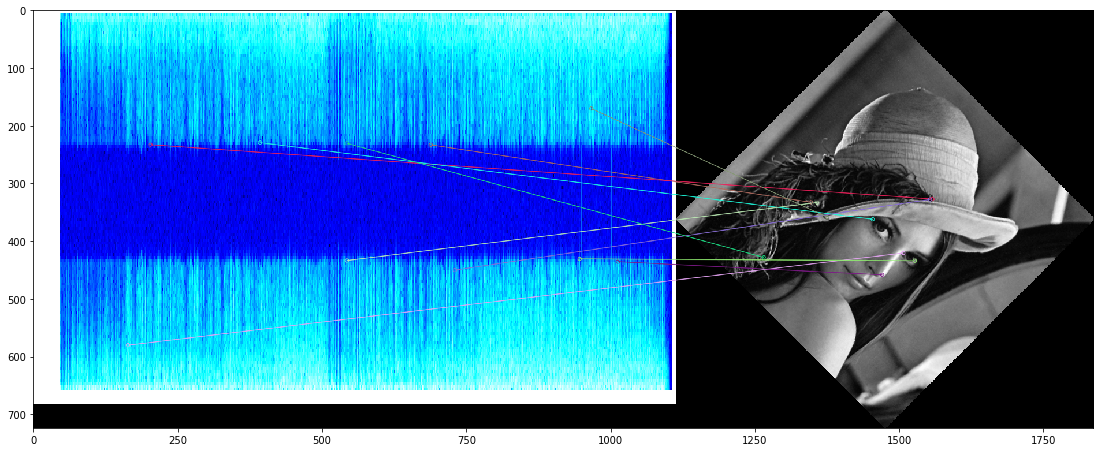

In [3]:

# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10], None, flags=2)
plt.figure(num=None, figsize=(19, 12))
plt.imshow(img3),plt.show();

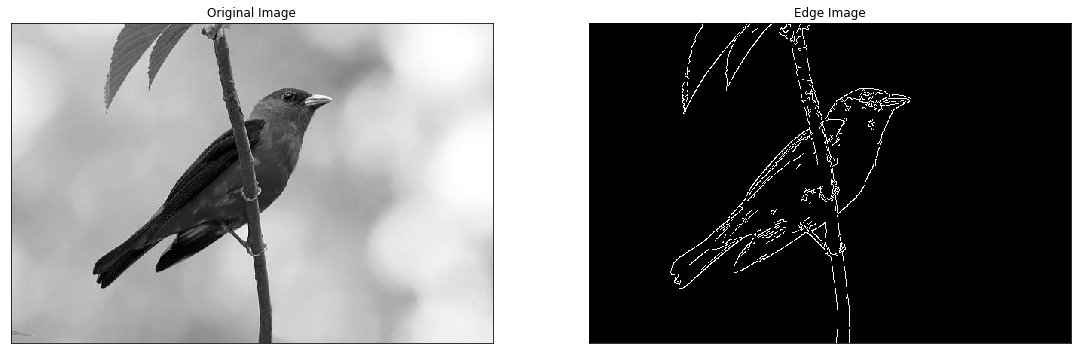

In [4]:
img = cv.imread('test.png',0)
edges = cv.Canny(img,100,200)

plt.figure(num=None, figsize=(19, 12))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

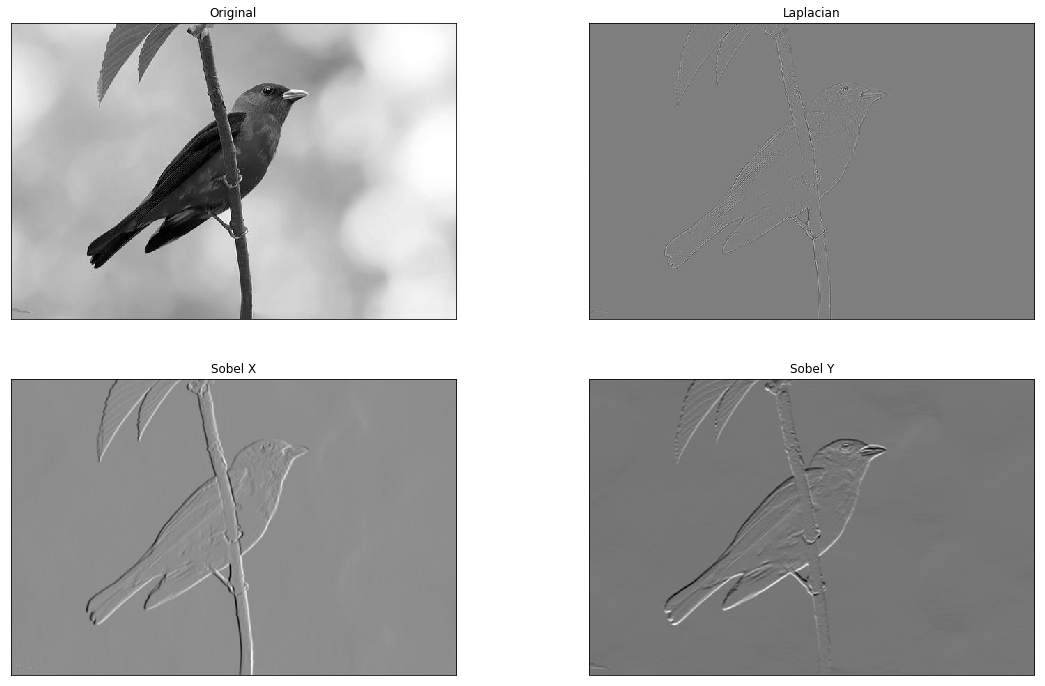

In [5]:

img = cv.imread('test.png',0)

laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.figure(num=None, figsize=(19, 12))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

/home/rendon/Documents/demo_mate_II/env/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


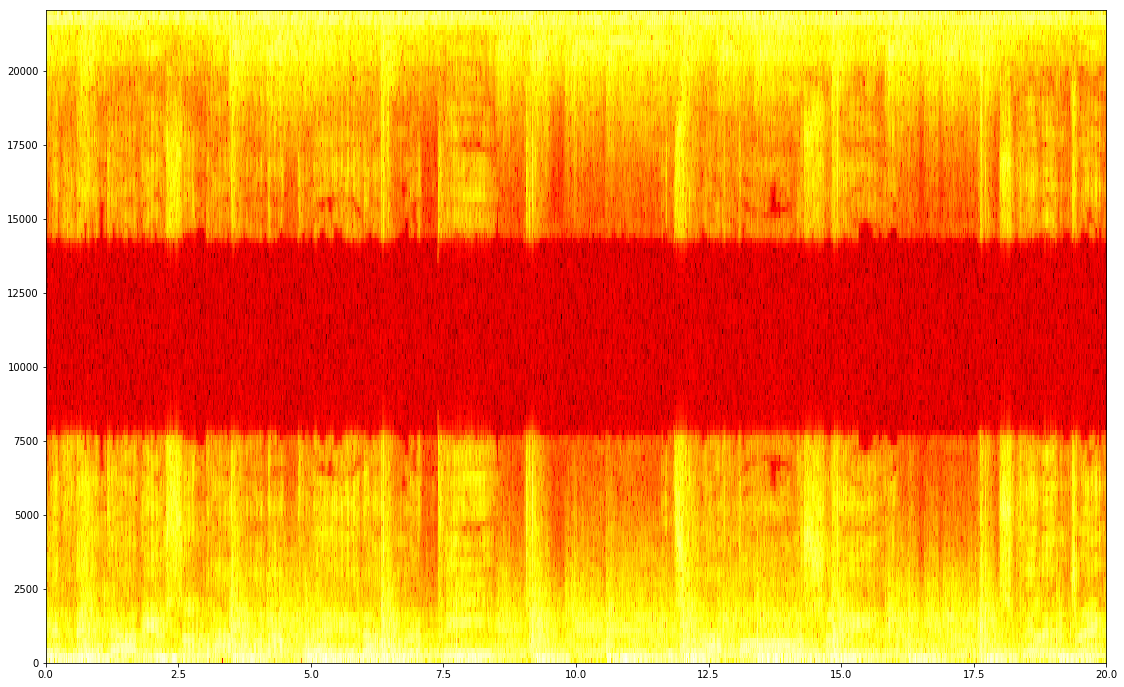

In [6]:
graph_spectrogram('./song-chunk.wav', 'spectrogram-chunk.png', 'on')